In [ ]:
import pandas as pda
import numpy as npy

happi = pda.read_csv("/content/drive/MyDrive/happiness_data.csv")
happi.shape

(1949, 11)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [ ]:
happi.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
happi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


We have 1949 rows of data. The code block above gives us a summary of the dataset using the describe(), info(), and head() functions on the dataframe. Our target variable, denoted as Y, is the "life expectancy" attribute.

Among the attributes, "Country name" is categorical, while the "Year" attribute is to be disregarded per assignment instructions. All other attributes are continuous float values.

We need to determine the number of unique categories in the "Country name" column and the count of records for each country.

In [ ]:
happi["Country name"].value_counts()

Bangladesh    15
Zimbabwe      15
Kyrgyzstan    15
Israel        15
Italy         15
              ..
Oman           1
Cuba           1
Guyana         1
Maldives       1
Suriname       1
Name: Country name, Length: 166, dtype: int64

In [ ]:
# dropping the year column
happi = happi.drop("year", axis=1)

## Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Finding statistical values by using the describe() function

In [ ]:
happi.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


We observed that each attribute has fewer than 1949 entries, with "Perceptions of corruption" having the fewest. We'll need to address these missing values later.

The describe() function provided statistics such as mean, standard deviation, quartiles (q1, q2, q3), minimum, and maximum values for each attribute. Plotting these values as histograms can offer further insights into their distribution.

Plotting the histogram of all the attributes


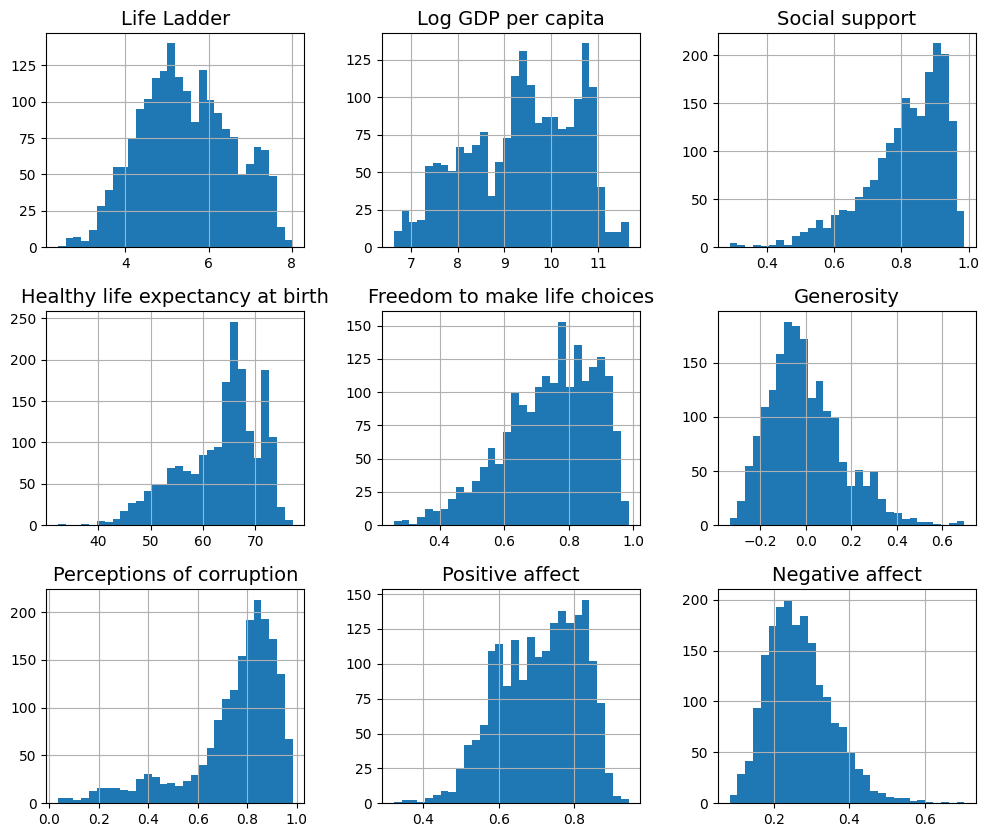

In [ ]:
import matplotlib.pyplot as pltl

# extra code – the next 5 lines define the default font sizes
pltl.rc('font', size=14)
pltl.rc('axes', labelsize=14, titlesize=14)
pltl.rc('legend', fontsize=14)
pltl.rc('xtick', labelsize=10)
pltl.rc('ytick', labelsize=10)

happi.hist(bins=30, figsize=(12, 10))
pltl.show()

The histograms reveal the distribution of each attribute in the dataset:

- Attributes are observed to exhibit varying scales.
- Histograms for "Perceptions of corruption," "Healthy life expectancy at Birth," and "Social support" display left-skewed distributions, whereas those for "Negative effect" and "Generosity" demonstrate right-skewed distributions. These distributions can be adjusted towards a Gaussian distribution by transforming feature values using methods such as taking square roots or binning.



##Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.


Calculate the Pearson correlation coefficient between the dataset attributes and the label.

In [ ]:
corr_matrix = happi.corr()
corr_matrix["Healthy life expectancy at birth"].sort_values(ascending=False)

<ipython-input-11-9153733fa115>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = happi.corr()


Healthy life expectancy at birth    1.000000
Log GDP per capita                  0.848049
Life Ladder                         0.744506
Social support                      0.616037
Freedom to make life choices        0.388681
Positive affect                     0.318247
Generosity                          0.020737
Negative affect                    -0.139477
Perceptions of corruption          -0.322461
Name: Healthy life expectancy at birth, dtype: float64

Let's drop features with lowest correlation

*   Generosity


In [ ]:
happi = happi.drop("Generosity", axis=1)

Create scatter plots between the selected attributes(from previous corr_matrix) to other and label

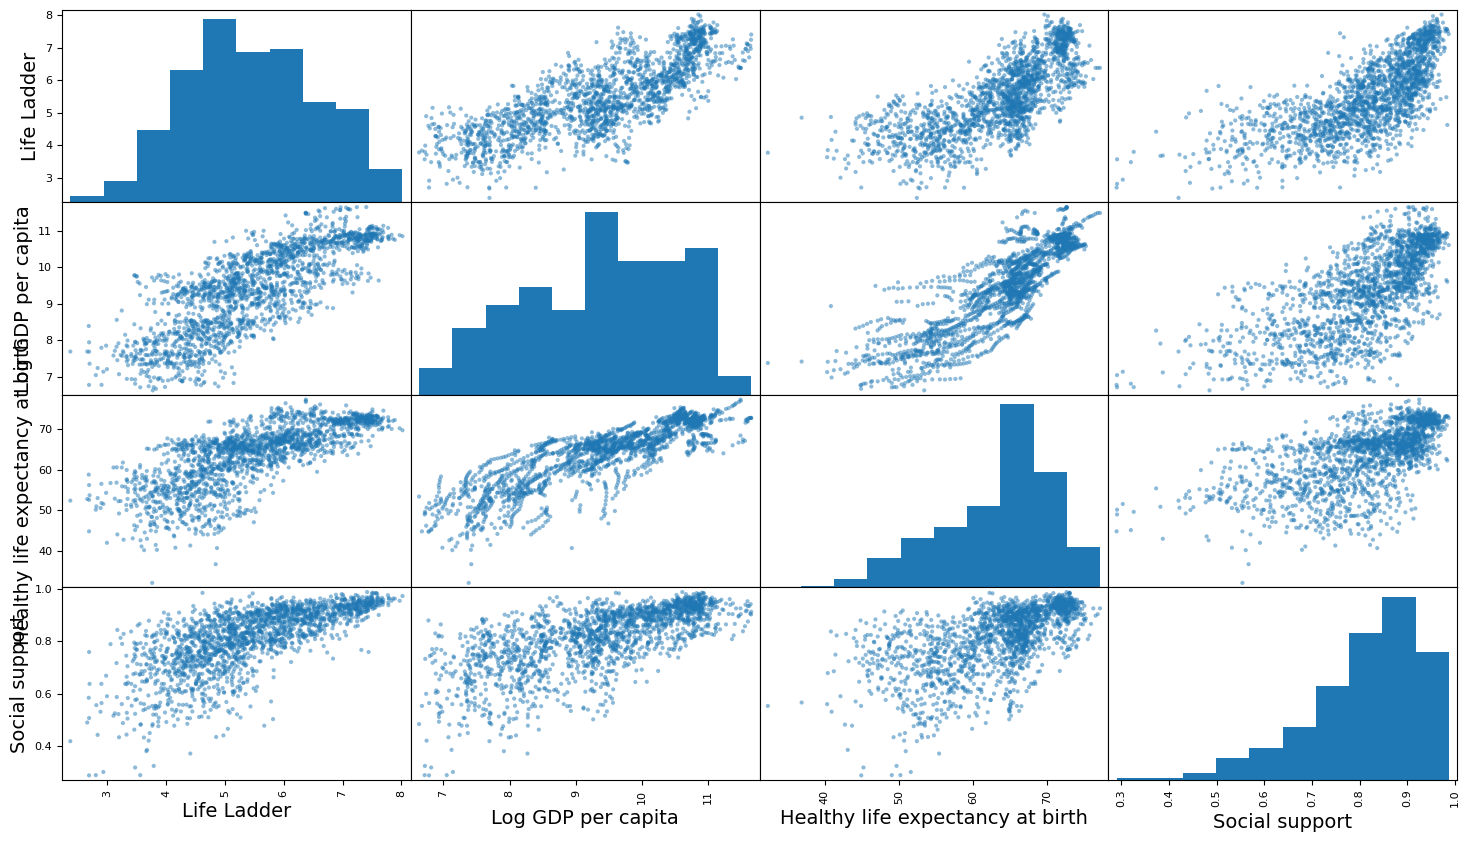

In [ ]:
from pandas.plotting import scatter_matrix
attribute = ["Life Ladder","Log GDP per capita","Healthy life expectancy at birth","Social support"]
scatter_matrix(happi[attribute], figsize=(18,10))
pltl.show()

The correlation between the attributes and the label appears to be strong, indicated by the consistent upward trend in all these attributes. Now, let's examine the correlation for the remaining attributes.

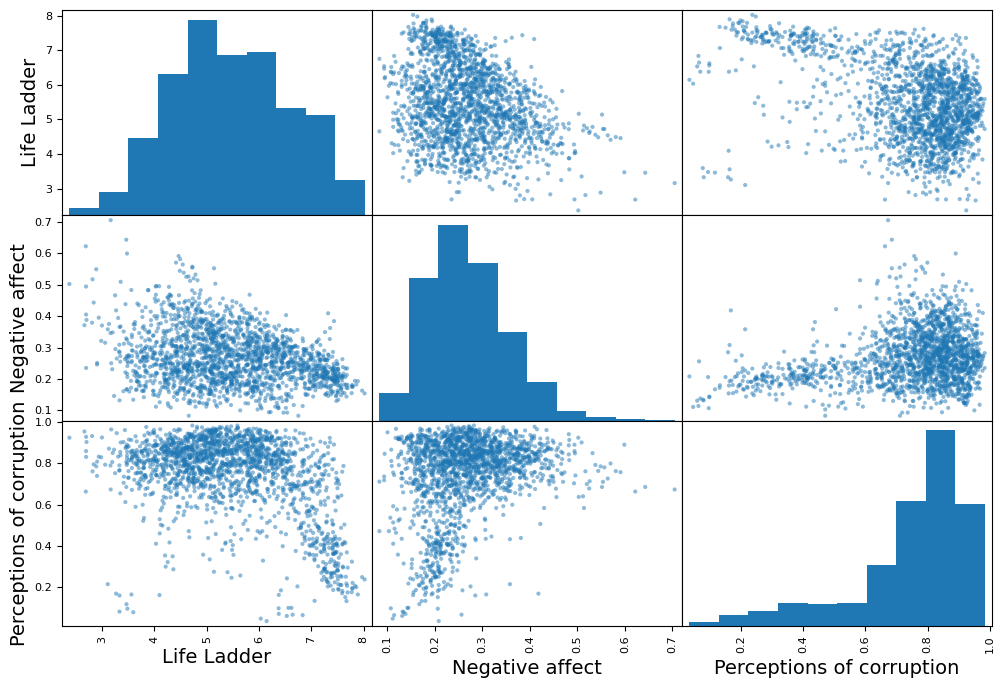

In [ ]:
neg_correlated_attributes = ["Life Ladder","Negative affect","Perceptions of corruption"]
scatter_matrix(happi[neg_correlated_attributes], figsize=(12,8))
pltl.show()

We notice that the negative attributes exhibit a downward trend and have lower correlation compared to previous attributes.

##Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

It's crucial for the test set to be a faithful representation of the entire dataset. Randomly selecting samples for the test set may result in an inadequate representation. Notably, the attribute "Log GDP Per Capita" demonstrates a pronounced upward correlation with the label "Life expectancy."

Before proceeding, it's observed that many numerical attributes have missing values. To address this issue, we'll utilize an "imputer" to fill in these missing values.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
happiness_num = happi.select_dtypes(include=[npy.number])
X = imputer.fit_transform(happiness_num)
happiness_tr = pda.DataFrame(X, columns=happiness_num.columns, index=happiness_num.index)
happiness_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1949 non-null   float64
 1   Log GDP per capita                1949 non-null   float64
 2   Social support                    1949 non-null   float64
 3   Healthy life expectancy at birth  1949 non-null   float64
 4   Freedom to make life choices      1949 non-null   float64
 5   Perceptions of corruption         1949 non-null   float64
 6   Positive affect                   1949 non-null   float64
 7   Negative affect                   1949 non-null   float64
dtypes: float64(8)
memory usage: 121.9 KB


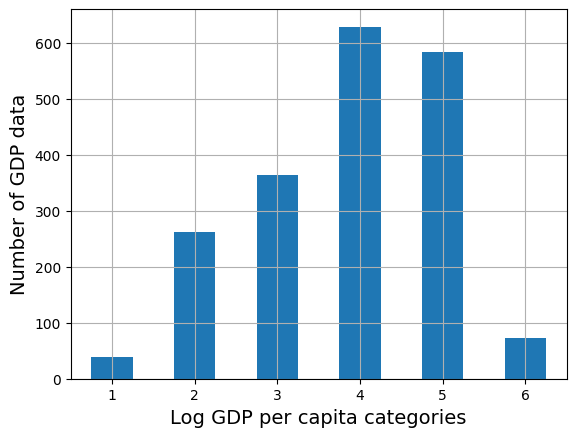

In [ ]:
happi["gdp_cat"] = pda.cut(happiness_tr["Log GDP per capita"],bins=[0,7,8,9,10,11,npy.inf],labels=[1,2,3,4,5,6])
happi["gdp_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
pltl.xlabel("Log GDP per capita categories")
pltl.ylabel("Number of GDP data")
pltl.show()

To ensure that the test set accurately reflects the distribution of GDP across the entire sample, let's create a category for GDP and include it as a new attribute. We can then utilize the "stratify" parameter, which allows us to split the dataset while maintaining the proportions of the given attribute, namely GDP in this case.

To prevent data snooping bias, we'll split the test data in a manner that keeps it untouched. Additionally, we'll perform dataset splitting both with and without stratified sampling, and then compare to determine if stratified sampling produces a better test set.

In [ ]:
happi.dropna(subset=["Healthy life expectancy at birth"],inplace=True)

Generating the test set without using stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(happi, test_size=0.2,random_state=42)

Generating the test set with stratified sampling based on the GDP category attribute.

In [ ]:
strat_train_set, strat_test_set = train_test_split(happi, test_size=0.2, stratify=happi["gdp_cat"], random_state=42)

In [ ]:
happi["gdp_cat"].value_counts()/len(happi) - strat_test_set["gdp_cat"].value_counts()/len(strat_test_set)

4    0.000167
5    0.000685
3    0.000099
2   -0.001510
6    0.001075
1   -0.000517
Name: gdp_cat, dtype: float64

In [ ]:
happi["gdp_cat"].value_counts()/len(happi) - test_set["gdp_cat"].value_counts()/len(test_set)

4   -0.020941
5   -0.004592
3    0.005376
2   -0.004149
6    0.019545
1    0.004760
Name: gdp_cat, dtype: float64

In [ ]:
happi["gdp_cat"].value_counts()/len(happiness_tr)

4    0.307850
5    0.290405
3    0.182145
2    0.134428
6    0.036942
1    0.020010
Name: gdp_cat, dtype: float64

Hence, it's evident from the comparison that the stratified test set using the "gdp_cap" attribute provides a better representation of the distribution of the entire dataset, with the exception of the first category.

Next, we can proceed to address categorical attributes. In this dataset, the only categorical attribute present is "Country name".

In [ ]:
happi["Country name"].value_counts()

Mexico            15
Moldova           15
United Kingdom    15
United States     15
Bolivia           15
                  ..
Maldives           1
Guyana             1
Oman               1
Suriname           1
Cuba               1
Name: Country name, Length: 162, dtype: int64

In [ ]:
len([item for item in happi["Country name"].value_counts() if item==15])

48

We observe that there are a total of 166 different countries in the dataset, with 48 countries having 15 records each.

Instead of converting the "Country name" attribute into numerical data using OneHotEncoding, which would add 166 new features (one for each country), let's try using Hashing encoding with n=10. This means we'll condense the information into 10 features instead of creating a separate feature for each country.

In [ ]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


encoder = ce.HashingEncoder(n_components=10)
happiness_cat = happi["Country name"]
happiness_encoded = encoder.fit_transform(happiness_cat)
happiness_encoded.value_counts()

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9
0      0      0      0      0      1      0      0      0      0        259
                     1      0      0      0      0      0      0        246
       1      0      0      0      0      0      0      0      0        243
       0      0      0      0      0      0      0      0      1        204
                            1      0      0      0      0      0        194
                            0      0      0      0      1      0        174
                                                 1      0      0        174
                                          1      0      0      0        169
1      0      0      0      0      0      0      0      0      0        155
0      0      1      0      0      0      0      0      0      0         76
dtype: int64

Next, let's scale and transform our features.



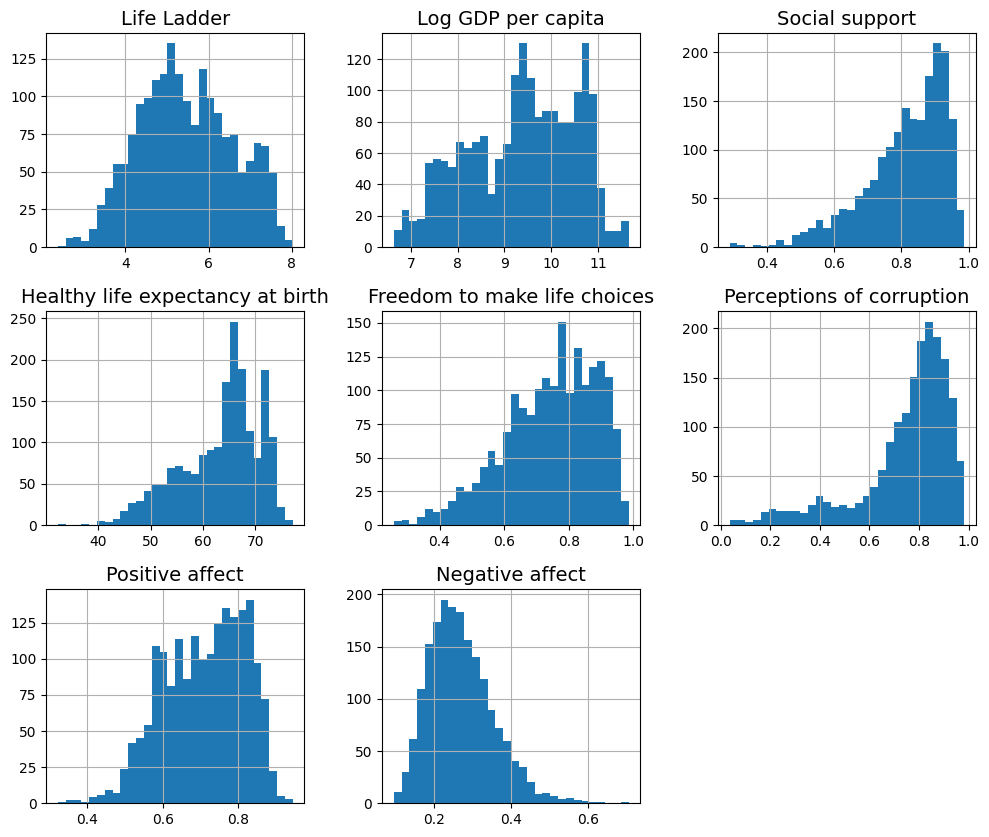

In [ ]:
import matplotlib.pyplot as pltl

# extra code – the next 5 lines define the default font sizes
pltl.rc('font', size=14)
pltl.rc('axes', labelsize=14, titlesize=14)
pltl.rc('legend', fontsize=14)
pltl.rc('xtick', labelsize=10)
pltl.rc('ytick', labelsize=10)

happi.hist(bins=30, figsize=(12, 10))
pltl.show()

Let's examine the distributions of attributes with heavy tails. We'll take the logarithm of these attributes to check if their distributions approximate normality.

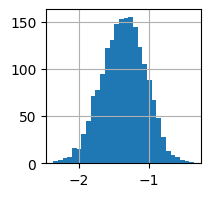

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(npy.log, inverse_func=npy.exp)
log_negative_effect = log_transformer.transform(happi["Negative affect"])
log_negative_effect.hist(bins=30, figsize=(2, 2))
pltl.show()


For "Negative affect," we'll apply the logarithm transformation to examine its distribution. For other attributes with left tails, we'll attempt to normalize them by applying the exponential transformation.

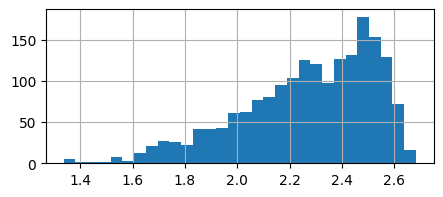

In [ ]:
exp_transformer = FunctionTransformer(npy.exp, inverse_func=npy.log)
exp_social_support = exp_transformer.transform(happi["Social support"])
exp_social_support.hist(bins=30, figsize=(5, 2))
pltl.show()

Since the previous transformation did not bring the distribution closer to normal, let's try applying a double exponential transformation and see if it improves.

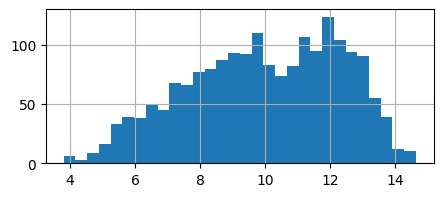

In [ ]:
double_exp_social_support = exp_transformer.transform(exp_social_support)
double_exp_social_support.hist(bins=30, figsize=(5, 2))
pltl.show()

The double exponential transformation can be applied to "Social support" and "Perceptions of corruption" to explore their distributions further.

We can standardize all these transformed attributes using a standard scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
happiness_num = std_scaler.fit_transform(happiness_num)
happiness_num

array([[-1.56237011e+00, -1.73208812e+00, -3.05233458e+00, ...,
         7.22268168e-01, -1.79321263e+00, -1.23837023e-01],
       [-9.54529634e-01, -1.58474663e+00, -2.19966153e+00, ...,
         5.50905106e-01, -1.17680578e+00, -3.70472107e-01],
       [-6.35368558e-01, -1.49200817e+00, -2.30941153e+00, ...,
        -2.14873579e-01, -8.59262864e-01,  7.58199496e-02],
       ...,
       [-1.65919426e+00, -1.14358891e+00, -3.17026961e-01, ...,
         5.18774532e-01, -2.90799097e-05, -6.64085302e-01],
       [-2.48578558e+00, -1.22939365e+00, -4.52103881e-01, ...,
         4.49158288e-01,  5.60079060e-02, -3.93961163e-01],
       [-2.06800732e+00, -1.33426612e+00, -8.06680795e-01, ...,
         2.24244268e-01, -6.54055635e-02,  9.09681424e-01]])

Separate the output label from the input features.

In [ ]:
happi = strat_train_set.drop("Healthy life expectancy at birth", axis=1)
happiness_labels = strat_train_set["Healthy life expectancy at birth"].copy()
new_index = list(range(len(happi)))
new_index_labels = list(range(len(happiness_labels)))
happiness = happi.set_index(pda.Index(new_index))
happiness_labels.index = new_index_labels

In [ ]:
happiness_labels

0       67.42
1       56.20
2       68.00
3       62.00
4       55.78
        ...  
1510    69.50
1511    53.78
1512    67.30
1513    51.66
1514    48.90
Name: Healthy life expectancy at birth, Length: 1515, dtype: float64

Let's transform all these preprocessing steps into a pipeline using transformers.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(npy.log, feature_names_out="one-to-one"),
    StandardScaler()
)

exp_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(npy.exp, feature_names_out="one-to-one"),
    StandardScaler()
)

double_exp_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(npy.exp, feature_names_out="one-to-one"),
    FunctionTransformer(npy.exp, feature_names_out="one-to-one"),
    StandardScaler()
)

cat_hashing_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    ce.HashingEncoder(n_components=100),
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"),
)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("log",log_pipeline,["Negative affect"]),
    ("exp",exp_pipeline,["Life Ladder"]),
    ("double_exp",double_exp_pipeline,["Social support","Perceptions of corruption"]),
    ("cat_hashing",cat_hashing_pipeline,["Country name"]),
],remainder = default_num_pipeline)

Now, let's feed the data into the pipeline for preprocessing.

In [ ]:
happiness_prepared = preprocessing.fit_transform(happiness)
happiness_prepared.shape

(1515, 108)

In [ ]:
preprocessing.get_feature_names_out()

array(['log__Negative affect', 'exp__Life Ladder',
       'double_exp__Social support',
       'double_exp__Perceptions of corruption', 'cat_hashing__col_0',
       'cat_hashing__col_1', 'cat_hashing__col_2', 'cat_hashing__col_3',
       'cat_hashing__col_4', 'cat_hashing__col_5', 'cat_hashing__col_6',
       'cat_hashing__col_7', 'cat_hashing__col_8', 'cat_hashing__col_9',
       'cat_hashing__col_10', 'cat_hashing__col_11',
       'cat_hashing__col_12', 'cat_hashing__col_13',
       'cat_hashing__col_14', 'cat_hashing__col_15',
       'cat_hashing__col_16', 'cat_hashing__col_17',
       'cat_hashing__col_18', 'cat_hashing__col_19',
       'cat_hashing__col_20', 'cat_hashing__col_21',
       'cat_hashing__col_22', 'cat_hashing__col_23',
       'cat_hashing__col_24', 'cat_hashing__col_25',
       'cat_hashing__col_26', 'cat_hashing__col_27',
       'cat_hashing__col_28', 'cat_hashing__col_29',
       'cat_hashing__col_30', 'cat_hashing__col_31',
       'cat_hashing__col_32', 'cat_hashi

##Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration

Apply linear regression on the training dataset and test it on the entire sample using the LinearRegression class, which utilizes Singular Value Decomposition (SVD).

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(happiness, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('linearregression', LinearRegression())])

In [ ]:
happiness_predictions = lin_reg.predict(happi)
happiness_labels[:5]

0    67.42
1    56.20
2    68.00
3    62.00
4    55.78
Name: Healthy life expectancy at birth, dtype: float64

In [ ]:
happiness_predictions[:5]

array([67.6295166 , 53.75323486, 69.30249023, 66.45428467, 56.2052002 ])

We can use mean_squared_error to assess the model's predictions compared to the labels.

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_rmse
# Calculate the standard deviation of the target variable
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)


Standardized RMSE: 0.37937474812585337
R-squared: 0.8560748004844453


It's evident that the predictions closely match the actual values for the last 5 labels.

Let's improve our evaluation by using cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, happiness, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)

Let's check the results

In [ ]:
pda.Series(lin_reg_rmses).describe()

count    10.000000
mean      2.990448
std       0.247939
min       2.716353
25%       2.826571
50%       2.942185
75%       3.069331
max       3.571194
dtype: float64

Let's try linear regression using Stochastic Gradient Descent (SGD). We can employ the SGDRegressor class, which by default optimizes using the Mean Squared Error (MSE) cost function.




In [ ]:
from sklearn.linear_model import SGDRegressor

lin_sgd_reg = make_pipeline(preprocessing,SGDRegressor(max_iter=10000, tol=None, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42))
lin_sgd_reg.fit(happi, happiness_labels.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('sgdregressor',
                 SGDRegressor(max_iter=10000, n_iter_no_change=100,
                              penalty=None, random_state=42, tol=None))])

In [ ]:
happiness_predictions = lin_sgd_reg.predict(happi)
lin_sgd_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_sgd_rmse

from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)
# Calculate the standard deviation of the target variable
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_rmse / target_std

print("Standardized RMSE:", standardized_rmse)

R-squared: 0.8560735247371128
Standardized RMSE: 0.37937474812585337


In [ ]:
lin_sgd_rmses = -cross_val_score(lin_sgd_reg, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_sgd_rmses).describe()

count    10.000000
mean      2.990411
std       0.249284
min       2.715695
25%       2.824342
50%       2.942626
75%       3.070096
max       3.574469
dtype: float64

It appears that there is minimal difference between the results obtained using SVD and SGD for our dataset. The mean is slightly reduced, but the standard deviation is actually increased.

Next, let's experiment with regularizing linear regression models using Ridge, Lasso, and Elastic Net. Let's begin with
### SVD based linear regression model

In [ ]:
from sklearn.linear_model import Ridge

lin_reg_with_ridge = make_pipeline(preprocessing,Ridge(alpha=0.1, solver="cholesky"))
lin_reg_with_ridge.fit(happi, happiness_labels.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('ridge', Ridge(alpha=0.1, solver='cholesky'))])

In [ ]:
happiness_predictions = lin_reg_with_ridge.predict(happi)
lin_ridge_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_ridge_rmse
# Calculate the standard deviation of the target variable
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_ridge_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.3794102049880109
R-squared: 0.8560478963509555


In [ ]:
lin_ridge_rmses = -cross_val_score(lin_reg_with_ridge, happiness, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_ridge_rmses).describe()

count    10.000000
mean      2.989765
std       0.247723
min       2.715943
25%       2.824343
50%       2.943753
75%       3.070048
max       3.570635
dtype: float64

### Regularizing SGD linear regression with ridge

In [ ]:
m = len(happiness_labels) # number of training examples
lin_sgd_with_ridge = make_pipeline(preprocessing,SGDRegressor(max_iter=10000, tol=None, penalty="l2", alpha=0.1/m, eta0=0.01, n_iter_no_change=100, random_state=42))
lin_sgd_with_ridge.fit(happi, happiness_labels.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('sgdregressor',
                 SGDRegressor(alpha=6.600660066006602e-05, max_iter=10000,
                              n_iter_no_change=100, random_state=42,
                              tol=None))])

In [ ]:
happiness_predictions = lin_sgd_with_ridge.predict(happi)
lin_sgd_ridge_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_sgd_ridge_rmse
# Calculate the standard deviation of the target variable
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_sgd_ridge_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.3794184730977672
R-squared: 0.8560416222721589


In [ ]:
lin_sgd_ridge_rmses = -cross_val_score(lin_sgd_with_ridge, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_sgd_ridge_rmses).describe()

count    10.000000
mean      2.990104
std       0.249215
min       2.715504
25%       2.822323
50%       2.945166
75%       3.070667
max       3.574716
dtype: float64

### Regularizing SVD linear regression with Lasso

In [ ]:
from sklearn.linear_model import Lasso

lin_svd_with_lasso = make_pipeline(preprocessing,Lasso(alpha=0.1))
lin_svd_with_lasso.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('lasso', Lasso(alpha=0.1))])

In [ ]:
happiness_predictions = lin_svd_with_lasso.predict(happi)
lin_svd_lasso_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_svd_lasso_rmse
# Calculate the standard deviation of the target variable
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_svd_lasso_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.5246986583598579
R-squared: 0.7246913179153651


In [ ]:
lin_svd_lasso_rmses = -cross_val_score(lin_svd_with_lasso, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_svd_lasso_rmses).describe()

count    10.000000
mean      3.940330
std       0.223732
min       3.583025
25%       3.803263
50%       3.970849
75%       4.121615
max       4.177903
dtype: float64

### Regularizing SGD linear regression with Lasso

In [ ]:
lin_sgd_with_lasso = make_pipeline(preprocessing,SGDRegressor(max_iter=10000, tol=None, penalty="l2", alpha=0.1, eta0=0.01, n_iter_no_change=100, random_state=42))
lin_sgd_with_lasso.fit(happi, happiness_labels.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('sgdregressor',
                 SGDRegressor(alpha=0.1, max_iter=10000, n_iter_no_change=100,
                              random_state=42, tol=None))])

In [ ]:
happiness_predictions = lin_sgd_with_lasso.predict(happi)
lin_sgd_lasso_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_sgd_lasso_rmse
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_sgd_lasso_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.5105398385715081
R-squared: 0.7393490732313783


In [ ]:
lin_sgd_lasso_rmses = -cross_val_score(lin_sgd_with_lasso, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_sgd_lasso_rmses).describe()

count    10.000000
mean      3.851230
std       0.215469
min       3.490340
25%       3.694606
50%       3.922604
75%       4.010599
max       4.095600
dtype: float64

### Regularizing SVD linear regression with Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

lin_svd_with_en = make_pipeline(preprocessing,ElasticNet(alpha=0.1, l1_ratio=0.5))
lin_svd_with_en.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [ ]:
happiness_predictions = lin_svd_with_en.predict(happi)
lin_svd_en_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_svd_en_rmse
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_svd_en_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.5225995808995781
R-squared: 0.7268896780435853


In [ ]:
lin_svd_en_rmses = -cross_val_score(lin_svd_with_en, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_svd_en_rmses).describe()

count    10.000000
mean      3.930474
std       0.218916
min       3.571191
25%       3.766755
50%       3.990806
75%       4.086731
max       4.182411
dtype: float64

### Regularizing SGD linear regression with Elastic Net

In [ ]:
lin_sgd_with_en = make_pipeline(preprocessing,SGDRegressor(max_iter=10000, tol=None, penalty="elasticnet", alpha=0.1, eta0=0.01, n_iter_no_change=100, random_state=42))
lin_sgd_with_en.fit(happi, happiness_labels.ravel())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('sgdregressor',
                 SGDRegressor(alpha=0.1, max_iter=10000, n_iter_no_change=100,
                              penalty='elasticnet', random_state=42,
                              tol=None))])

In [ ]:
happiness_predictions = lin_sgd_with_en.predict(happi)
lin_sgd_en_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_sgd_en_rmse
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_sgd_en_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.5152605733041588
R-squared: 0.7345065415982697


In [ ]:
lin_sgd_en_rmses = -cross_val_score(lin_sgd_with_en, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_sgd_en_rmses).describe()

count    10.000000
mean      3.881624
std       0.215245
min       3.519951
25%       3.728122
50%       3.950981
75%       4.035414
max       4.130227
dtype: float64

Now, let's calculate the Root Mean Squared Error (RMSE) for all combinations of regularization techniques and linear regression models.

In [ ]:
regularization_results = pda.DataFrame()
regularization_results["svd"] = pda.Series(lin_reg_rmses)
regularization_results["sgd"] = pda.Series(lin_sgd_rmses)
regularization_results["svd-ridge"] = pda.Series(lin_ridge_rmses)
regularization_results["sgd-ridge"] = pda.Series(lin_sgd_ridge_rmses)
regularization_results["svd-lasso"] = pda.Series(lin_svd_lasso_rmses)
regularization_results["sgd-lasso"] = pda.Series(lin_sgd_lasso_rmses)
regularization_results["svd-elasticnet"] = pda.Series(lin_svd_en_rmses)
regularization_results["sgd-elasticnet"] = pda.Series(lin_sgd_en_rmses)
regularization_results.describe()

,svd,sgd,svd-ridge,sgd-ridge,svd-lasso,sgd-lasso,svd-elasticnet,sgd-elasticnet
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.990448,2.990411,2.989765,2.990104,3.940330,3.851230,3.930474,3.881624
std,0.247939,0.249284,0.247723,0.249215,0.223732,0.215469,0.218916,0.215245
min,2.716353,2.715695,2.715943,2.715504,3.583025,3.490340,3.571191,3.519951
25%,2.826571,2.824342,2.824343,2.822323,3.803263,3.694606,3.766755,3.728122
50%,2.942185,2.942626,2.943753,2.945166,3.970849,3.922604,3.990806,3.950981
75%,3.069331,3.070096,3.070048,3.070667,4.121615,4.010599,4.086731,4.035414
max,3.571194,3.574469,3.570635,3.574716,4.177903,4.095600,4.182411,4.130227


Observing that linear regression with ridge regularization yields the lowest mean RMSE, let's attempt to improve the performance of SGD with ridge regularization by adjusting its hyperparameters. These hyperparameters include the number of epochs (max_iter), learning rate (eta0), penalty type (ridge penalty), and alpha value (strength of ridge regularization).

In [ ]:
m = len(happiness_labels) # number of training examples
lin_sgd_with_ridge2 = make_pipeline(preprocessing,SGDRegressor(max_iter=1000, tol=None, penalty="l2", alpha=1/m, eta0=0.01, n_iter_no_change=100, random_state=42))
lin_sgd_with_ridge2.fit(happi, happiness_labels.ravel())


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0006600660066006601, n_iter_no_change=100,
                              random_state=42, tol=None))])

In [ ]:
happiness_predictions = lin_sgd_with_ridge2.predict(happi)
lin_sgd_ridge2_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
lin_sgd_ridge2_rmse

target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = lin_sgd_ridge2_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.3841158202005804
R-squared: 0.8524550366716354


In [ ]:
lin_sgd_ridge_rmses = -cross_val_score(lin_sgd_with_ridge2, happi, happiness_labels, scoring="neg_root_mean_squared_error", cv=10)
pda.Series(lin_sgd_ridge_rmses).describe()

count    10.000000
mean      3.034314
std       0.255579
min       2.763430
25%       2.832215
50%       3.016269
75%       3.143012
max       3.628688
dtype: float64

To visualize the performance across different hyperparameter settings, we'll implement our own cross-validation function. This is because cross_val_score doesn't provide the level of granularity we need for generating the graph.

Iteration 1: Training Loss = 32.3561621079361, Validation Loss = 35.87699599863955
Iteration 2: Training Loss = 16.408761239242683, Validation Loss = 15.368320540429757
Iteration 3: Training Loss = 15.463833631959082, Validation Loss = 13.559431575869215
Iteration 4: Training Loss = 15.060088881873108, Validation Loss = 13.19624611186714
Iteration 5: Training Loss = 14.780894187139104, Validation Loss = 12.983074985160373
Iteration 6: Training Loss = 14.580376759868564, Validation Loss = 12.930920791039638
Iteration 7: Training Loss = 14.42036461838671, Validation Loss = 12.874309188637731
Iteration 8: Training Loss = 14.172668109689088, Validation Loss = 12.496290527186456
Iteration 9: Training Loss = 14.009860821115817, Validation Loss = 12.343774334813903
Iteration 10: Training Loss = 13.841095393092365, Validation Loss = 12.292994128306619
Iteration 11: Training Loss = 13.721786679061392, Validation Loss = 12.097464590799214
Iteration 12: Training Loss = 13.557964670739365, Validat

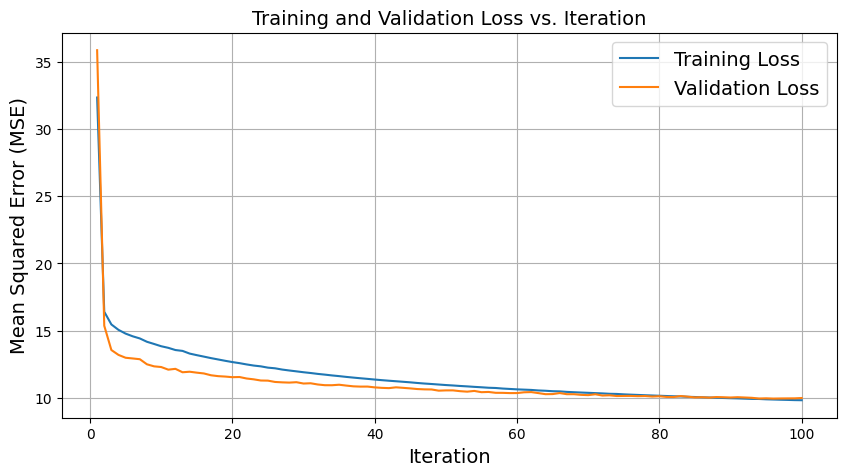

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

happiness_prepared = preprocessing.fit_transform(happi)
X_train, X_val, y_train, y_val = train_test_split(happiness_prepared, happiness_labels, test_size=0.2, random_state=42)



ridge_sgd = SGDRegressor(loss='squared_error', penalty='l2', alpha=1, max_iter=1, warm_start=True, random_state=42, eta0=0.1, learning_rate='constant')


model = Pipeline(steps=[('preprocessor', preprocessing),
                        ('regressor', ridge_sgd)])


train_losses = []
validation_losses = []

regressor = SGDRegressor(loss='squared_error', max_iter=100, tol=1e-3)


train_loss = []
val_loss = []


for iteration in range(1, 101):
    regressor.partial_fit(X_train, y_train)


    y_train_pred = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_loss.append(train_mse)


    y_val_pred = regressor.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_loss.append(val_mse)

    print(f'Iteration {iteration}: Training Loss = {train_mse}, Validation Loss = {val_mse}')


pltl.figure(figsize=(10, 5))
pltl.plot(range(1, 101), train_loss, label='Training Loss')
pltl.plot(range(1, 101), val_loss, label='Validation Loss')
pltl.xlabel('Iteration')
pltl.ylabel('Mean Squared Error (MSE)')
pltl.title('Training and Validation Loss vs. Iteration')
pltl.legend()
pltl.grid(True)
pltl.show()

###Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.

Now, let's tackle this problem using polynomial regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = make_pipeline(preprocessing,PolynomialFeatures(degree=3, include_bias=False),LinearRegression())
poly_reg.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [ ]:
happiness_predictions = poly_reg.predict(happi)
poly_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
poly_rmse
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = poly_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 1.2850561353738592e-14
R-squared: 1.0


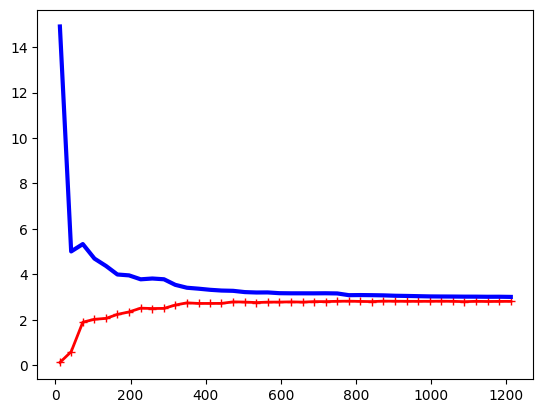

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(SGDRegressor(max_iter=10000, tol=None, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42),happiness_prepared,happiness_labels,train_sizes=npy.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

pltl.plot(train_sizes, train_errors, "r-+",linewidth=2,label="train")
pltl.plot(train_sizes, valid_errors, "b-", linewidth=3,label="valid")
pltl.show()

Now, let's incorporate regularization techniques into polynomial regression.

##Polynomial regression with Ridge Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_ridge_reg = make_pipeline(preprocessing,PolynomialFeatures(degree=2, include_bias=False),SGDRegressor(max_iter=10000, tol=None, penalty="l2", alpha=0.1/m, eta0=0.01, n_iter_no_change=100, random_state=42))
poly_ridge_reg.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('sgdregressor',
                 SGDRegressor(alpha=6.600660066006602e-05, max_iter=10000,
                              n_iter_no_change=100, random_state=42,
                              tol=None))])

In [ ]:
happiness_predictions = poly_ridge_reg.predict(happi)
poly_ridge_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
poly_ridge_rmse
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = poly_ridge_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.14565450680725056
R-squared: 0.9787847646467366


Polynomial regression with Lasso Regression



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_lasso_reg = make_pipeline(preprocessing,PolynomialFeatures(degree=2, include_bias=False),Lasso(alpha=0.1))
poly_lasso_reg.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('lasso', Lasso(alpha=0.1))])

In [ ]:
happiness_predictions = poly_lasso_reg.predict(happi)
poly_lasso_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = poly_lasso_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.4851365532567772
R-squared: 0.7646425246941342


Polynomial regression with ElasticNet Regression

In [ ]:
poly_elasticnet_reg = make_pipeline(preprocessing,PolynomialFeatures(degree=2, include_bias=False),ElasticNet(alpha=0.1, l1_ratio=0.5))
poly_elasticnet_reg.fit(happi, happiness_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Social support',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('cat_hashing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashingencoder',
                                                                   HashingEncoder(max_process=1,
                                                                                  n_components=100))]),
                                                  ['Country name'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [ ]:
happiness_predictions = poly_elasticnet_reg.predict(happi)
poly_elasticnet_rmse = mean_squared_error(happiness_labels,happiness_predictions,squared=False)
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = poly_lasso_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

Standardized RMSE: 0.4851365532567772
R-squared: 0.7819558758098882


## Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

Now, let's assess the performance of the final model on the test set.

In [ ]:
X_test = strat_test_set.drop("Healthy life expectancy at birth",axis=1)
y_test = strat_test_set["Healthy life expectancy at birth"].copy()

final_predictions = lin_sgd_with_ridge.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = final_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

3.022506038397464
Standardized RMSE: 0.4048421199049386
R-squared: 0.7819558758098882


In linear regression, we found that models with Ridge regularization exhibit the lowest mean cross-validation squared error. Now, in polynomial regression, let's assess the RMSE of models with ElasticNet regularization.

In [ ]:
X_test = strat_test_set.drop("Healthy life expectancy at birth",axis=1)
y_test = strat_test_set["Healthy life expectancy at birth"].copy()

final_predictions = poly_elasticnet_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)
target_std = npy.std(happiness_labels)

# Standardize the RMSE
standardized_rmse = final_rmse / target_std

print("Standardized RMSE:", standardized_rmse)
from sklearn.metrics import r2_score

# Assuming car_labels are the actual target values and car_predictions are the predicted values
r_squared = r2_score(happiness_labels, happiness_predictions)

print("R-squared:", r_squared)

3.5983141071119493
Standardized RMSE: 0.48196731212468247
R-squared: 0.7819558758098882


Based on the mean squared error analysis, Linear Regression with Ridge Regularization performs well for this dataset, while Polynomial Regression with ElasticNet Regularization also yields promising results. Additionally, in Polynomial Regression, degrees higher than 3 exhibit notably lower loss compared to degrees lower than 3.

Further improvements could include:

- Exploring alternative methods for encoding categorical data beyond hash encoding.
- Conducting more extensive hyperparameter tuning in polynomial regressions, particularly experimenting with different degrees and alpha values for ridge regularization.
- Investigating more sophisticated techniques for data imputation instead of relying solely on median values.
- Removing outliers from the dataset before training the models to potentially improve model performance.
- Considering alternative methods for transforming attributes with multimodal distributions to better approximate normal distributions.

Group assignment done by:

*   Varsha Karanam
*   Veda Charitha Bellam
*   Pradyumna Kaputhimmareddy





Referenced:
 - Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition)
 - Medium articles : https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0
 - Medium articles : https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0
 - Medium articles : https://medium.com/nerd-for-tech/regularization-techniques-in-machine-learning-a31daf2acc3e
 - "We employed OpenAI's ChatGPT model for conversational AI tasks, which is a variant of the GPT-3 model (Brown et al., 2020)."



